
# 🧠 Objetos_salon

**Course:** Big Data & Deep Learning  
**Module:** Convolutional Neural Networks  
**Proyecto colaborativo:** Reconocimiento de objetos con TensorFlow


---

## Objetivo

Construir, entrenar y evaluar un modelo de visión que identifique objetos del entorno grabados por los estudiantes, utilizando redes convolucionales, autoencoders y clasificadores.

---


Inicialmente configuramos el entorno de Google COLAB.

Instalación: Se instalan las librerías esenciales opencv-python (Visión por Computador), matplotlib (visualización) y numpy (cálculo numérico/imágenes como matrices) con !pip install --quiet.

Importación y Verificación: Luego se importan con sus alias estándar (cv2, np, plt). Finalmente, se imprime la versión de OpenCV para confirmar la instalación y carga exitosa.

In [ ]:

# 🧰 Install dependencies (Colab environment)
!pip install opencv-python matplotlib numpy --quiet

import cv2
import numpy as np
import matplotlib.pyplot as plt

print("OpenCV version:", cv2.__version__)


OpenCV version: 4.12.0



## 🖼️ 1. Importar el data set de imagenes desde Github

Este comando de Git en Colab (!git clone URL) descarga el repositorio completo de GitHub, incluyendo todas las carpetas y archivos (objetos_salon), a nuestro entorno, lo que simplifica y acelera el acceso a las imágenes en comparación con la descarga individual por API. Tras ejecutarlo, la carpeta aparece en el explorador de archivos.


In [ ]:
!git clone https://github.com/linaferbalaguera23/objetos_salon.git

fatal: destination path 'objetos_salon' already exists and is not an empty directory.


In [ ]:
!rm -rf objetos_salon

In [ ]:
!git clone https://github.com/linaferbalaguera23/objetos_salon.git

Cloning into 'objetos_salon'...
remote: Enumerating objects: 2476, done.
remote: Counting objects: 100% (624/624), done.
remote: Compressing objects: 100% (478/478), done.
remote: Total 2476 (delta 194), reused 356 (delta 146), pack-reused 1852 (from 5)
Receiving objects: 100% (2476/2476), 1.23 GiB | 33.10 MiB/s, done.
Resolving deltas: 100% (456/456), done.
Updating files: 100% (1764/1764), done.


Este proceso inicial se centra en la preparación e inspección del conjunto de datos.

El siguiente bloque de código describe el procedimiento para cargar imágenes desde una carpeta específica (utilizando la CPU como ejemplo inicial):

1.   Dependencias: Se importan las librerías glob (para la búsqueda de archivos por patrón) y os (para la gestión de rutas del sistema operativo).
2.   Identificación de Archivos: Se utiliza glob.glob() para encontrar todas las rutas de archivo con extensión .png dentro de la carpeta designada, generando una lista de rutas (image_paths).
3. Iteración de Carga: Se inicia un bucle para procesar cada ruta de imagen individualmente (img_path).
4. Lectura de Imagen: cv2.imread(img_path) lee el archivo de imagen desde el disco y lo almacena en memoria como un array de NumPy.
5. Ajuste de Color (Punto Crucial): Por defecto, OpenCV utiliza el formato BGR. Dado que las librerías de visualización (como Matplotlib) y deep learning suelen requerir el formato RGB, la línea cv2.cvtColor(img, cv2.COLOR_BGR2RGB) realiza la conversión de canales necesaria para asegurar una correcta visualización de los colores.
6. Colección de Datos: La imagen con el formato de color corregido (RGB) se añade a la lista principal (images) que conforma el conjunto de datos.
7. Validación: Finalmente, se emplea plt.imshow() para mostrar la primera imagen de la lista (images[0]). Este paso es esencial para verificar que la carga de archivos, las rutas y la corrección de color se hayan ejecutado correctamente.





Se encontraron 175 imágenes.


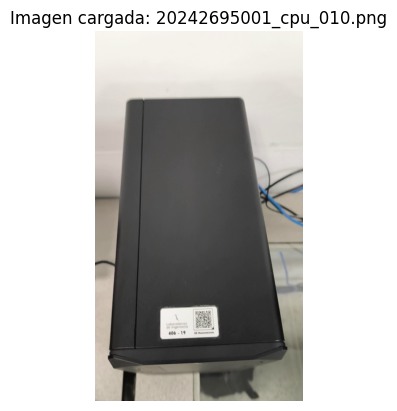

In [ ]:
import cv2
import glob
import matplotlib.pyplot as plt
import os


folder_path = 'objetos_salon/processed/cpu/'

image_paths = glob.glob(os.path.join(folder_path, '*.png'))

images = []
print(f"Se encontraron {len(image_paths)} imágenes.")

for img_path in image_paths:

    img = cv2.imread(img_path)

    if img is not None:

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img_rgb)
    else:
        print(f"No se pudo leer la imagen: {img_path}")


if images:
    plt.imshow(images[0])
    plt.title(f"Imagen cargada: {os.path.basename(image_paths[0])}")
    plt.axis("off")
    plt.show()


### 🧩 Cargando las imágenes desde Github
El siguiente bloque de código implementa un método programático para cargar las imágenes directamente desde la API de GitHub. Primero, nos conectamos a la api_url específica usando urllib.request y, con la biblioteca json, interpretamos la respuesta para obtener una lista (file_list) de todos los archivos en la carpeta del repositorio. Luego, iteramos sobre esta lista y, por cada archivo que sea .png, extraemos su download_url única. En el paso clave de decodificación, descargamos el contenido crudo (en bytes) de esa URL, lo convertimos en un array de NumPy y usamos cv2.imdecode para transformarlo en una matriz de píxeles BGR. Inmediatamente después, aplicamos cv2.cvtColor para corregir el espacio de color a RGB, guardamos la imagen procesada en nuestra images_rgb_list y, como verificación final, mostramos la primera imagen con plt.imshow para confirmar que todo el proceso de descarga y decodificación fue exitoso.


Iniciando carga y procesamiento de imágenes...
Procesando 1/225: 20172167090_Cpu_1.png
Procesando 2/225: 20172167090_Cpu_10.png
Procesando 3/225: 20172167090_Cpu_2.png
Procesando 4/225: 20172167090_Cpu_3.png
Procesando 5/225: 20172167090_Cpu_4.png
Procesando 6/225: 20172167090_Cpu_5.png
Procesando 7/225: 20172167090_Cpu_6.png
Procesando 8/225: 20172167090_Cpu_7.png
Procesando 9/225: 20172167090_Cpu_8.png
Procesando 10/225: 20172167090_Cpu_9.png
Procesando 11/225: 20241695014_cpu_0001.png
Procesando 12/225: 20241695014_cpu_0002.png
Procesando 13/225: 20241695014_cpu_0003.png
Procesando 14/225: 20241695014_cpu_0004.png
Procesando 15/225: 20241695014_cpu_0005.png
Procesando 16/225: 20241695014_cpu_0006.png
Procesando 17/225: 20241695014_cpu_0007.png
Procesando 18/225: 20241695014_cpu_0008.png
Procesando 19/225: 20242595003_cpu_0001.png
Procesando 20/225: 20242595003_cpu_0002.png
Procesando 21/225: 20242595003_cpu_0003.png
Procesando 22/225: 20242595003_cpu_0004.png
Procesando 23/225: 2024

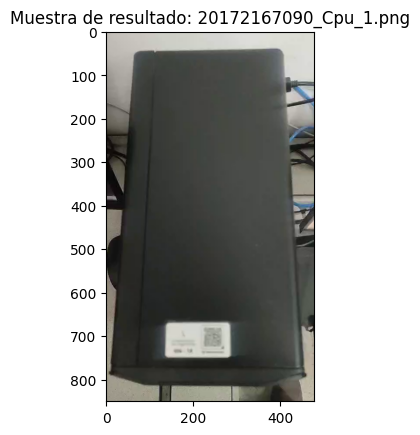

In [ ]:
import urllib.request
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt

api_url = 'https://api.github.com/repos/linaferbalaguera23/objetos_salon/contents/processed/cpu'


images_rgb_list = []
image_names = []

print("Iniciando carga y procesamiento de imágenes...")

try:
    with urllib.request.urlopen(api_url) as response:
        file_list = json.loads(response.read().decode())


    for i, file_info in enumerate(file_list):


        if file_info['type'] == 'file' and file_info['name'].endswith('.png'):


            url = file_info['download_url']
            image_names.append(file_info['name'])

            print(f"Procesando {i+1}/{len(file_list)}: {file_info['name']}")



            try:

                resp = urllib.request.urlopen(url)
                image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
                img = cv2.imdecode(image_array, cv2.IMREAD_COLOR)


                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


                images_rgb_list.append(img_rgb)



            except Exception as e:
                print(f"  -- Error al procesar la imagen {url}: {e}")


except Exception as e:
    print(f"Error al contactar la API de GitHub: {e}")




print(f"\n¡Procesamiento completo! Se cargaron y procesaron {len(images_rgb_list)} imágenes.")


if images_rgb_list:
    plt.imshow(images_rgb_list[0])
    plt.title(f"Muestra de resultado: {image_names[0]}")
    #plt.axis("off")
    plt.show()

# **Primer Experimento (Autoencoder Flatten)**

Para el primer ejercicio, se creó un autoencoder "Denso" (fully-connected) usando capas Flatten y Dense. Este modelo se entrenó solo con las imágenes de la carpeta CPU:. El objetivo era validar la mecánica del autoencoder: comprimir la entrada con un codificador a un espacio latente y luego reconstruirla con un decodificador.

## Estandarización de imágenes
A. Verificación de Tamaños
Primero, un script verifica nuestra hipótesis: itera sobre images_rgb_list, extrae y añade sus dimensiones (alto, ancho) a un set de Python. Un set ignora duplicados, ideal para hallar "tamaños únicos". La salida (ej. "Se encontraron 7 tamaños únicos") confirma la inconsistencia de las imágenes y la necesidad de redimensionar antes de entrenar cualquier modelo.

B. Método de Redimensión: Relleno (Padding)
Aunque escalar imágenes a un tamaño fijo (ej. 128x128) es una opción, distorsionaría la proporción de los objetos. Un método mejor es redimensionar manteniendo la proporción y añadir relleno negro. Esta lista de imágenes de 128x128, sin distorsión, se usó en el primer experimento con el autoencoder.


Finalmente en la última fase del pre-procesamiento de datos, se convierte la lista de imágenes (padded_images_list) en un único tensor de NumPy con la forma (N, 128, 128, 3) que Keras/TensorFlow espera. El paso más importante es la normalización, donde se cambia el tipo de dato a float32 y se dividen todos los valores de los píxeles por 255.0. Este proceso reescala el rango de [0, 255] a [0.0, 1.0], lo cual es esencial para que la red neuronal entrene de manera más rápida y estable. Las impresiones finales sirven como una verificación crucial para confirmar que el dataset tiene la forma, el tipo (float32) y el rango de valores correctos, dejándolo listo para el modelo.


In [ ]:

import numpy as np

unique_sizes = set()

for img in images_rgb_list:

    unique_sizes.add(img.shape[:2])

print(f"Se encontraron {len(unique_sizes)} tamaños únicos:")
for size in unique_sizes:
    print(f"- Alto: {size[0]}px, Ancho: {size[1]}px")


if images_rgb_list:
    print(f"\nEjemplo: La primera imagen tiene un tamaño de {images_rgb_list[0].shape}")

Se encontraron 9 tamaños únicos:
- Alto: 1920px, Ancho: 1080px
- Alto: 233px, Ancho: 233px
- Alto: 480px, Ancho: 848px
- Alto: 850px, Ancho: 478px
- Alto: 1280px, Ancho: 720px
- Alto: 224px, Ancho: 224px
- Alto: 850px, Ancho: 474px
- Alto: 864px, Ancho: 480px
- Alto: 856px, Ancho: 480px

Ejemplo: La primera imagen tiene un tamaño de (850, 478, 3)


Redimensionando con padding a (128, 128)...
¡Proceso completado!


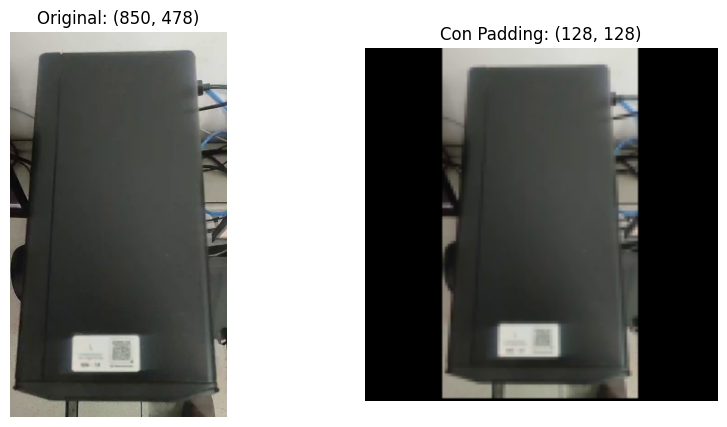

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def resize_and_pad(img, target_size=(128, 128)):
    """
    Redimensiona una imagen para que quepa en 'target_size'
    manteniendo el aspect ratio y añadiendo padding negro.

    target_size debe ser (ancho, alto)
    """

    h, w = img.shape[:2]
    target_w, target_h = target_size


    ratio = min(target_w / w, target_h / h)


    new_w = int(w * ratio)
    new_h = int(h * ratio)


    resized_img = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)


    canvas = np.zeros((target_h, target_w, 3), dtype=np.uint8)

    y_offset = (target_h - new_h) // 2
    x_offset = (target_w - new_w) // 2

    canvas[y_offset:y_offset + new_h, x_offset:x_offset + new_w] = resized_img

    return canvas


padded_images_list = []
TARGET_SIZE = (128, 128)

print(f"Redimensionando con padding a {TARGET_SIZE}...")

for img in images_rgb_list:
    padded_img = resize_and_pad(img, target_size=TARGET_SIZE)
    padded_images_list.append(padded_img)

print("¡Proceso completado!")


if padded_images_list:


    idx_to_check = 0

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(images_rgb_list[idx_to_check])
    plt.title(f"Original: {images_rgb_list[idx_to_check].shape[:2]}")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(padded_images_list[idx_to_check])
    plt.title(f"Con Padding: {padded_images_list[idx_to_check].shape[:2]}")
    plt.axis("off")

    plt.show()

In [ ]:
import numpy as np


train_images = np.array(padded_images_list)


train_images = train_images.astype('float32') / 255.0


print("--- Datos listos para el entrenamiento ---")
print(f"Forma (Shape) del array de entrenamiento: {train_images.shape}")
print(f"Tipo de datos (dtype): {train_images.dtype}")
print(f"Valor mínimo de los píxeles: {train_images.min()}")
print(f"Valor máximo de los píxeles: {train_images.max()}")

--- Datos listos para el entrenamiento ---
Forma (Shape) del array de entrenamiento: (175, 128, 128, 3)
Tipo de datos (dtype): float32
Valor mínimo de los píxeles: 0.0
Valor máximo de los píxeles: 1.0


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      # tf.math.reduce_prod(shape) shape 128*128*3
      layers.Dense(tf.math.reduce_prod(shape).numpy(), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


# 'shape' será (128, 128, 3)
shape = train_images.shape[1:]
latent_dim = 64

autoencoder_denso = Autoencoder(latent_dim, shape)


autoencoder_denso.compile(optimizer='adam', loss='mean_squared_error')


print("--- Entrenando el Autoencoder DENSO ---")
history_denso = autoencoder_denso.fit(
    train_images,
    train_images,
    epochs=50,
    batch_size=16,
    shuffle=True,
    verbose=0
)
print("¡Entrenamiento del modelo DENSO completado!")


reconstructed_dense = autoencoder_denso.predict(train_images)

--- Entrenando el Autoencoder DENSO ---
¡Entrenamiento del modelo DENSO completado!
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [ ]:
autoencoder_denso.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(
    train_images,
    test_size=0.2,
    random_state=42
)

print(f"Total de imágenes: {len(train_images)}")
print(f"Imágenes para entrenar (x_train): {len(x_train)}")
print(f"Imágenes para validar (x_test): {len(x_test)}")

Total de imágenes: 175
Imágenes para entrenar (x_train): 140
Imágenes para validar (x_test): 35



El siguiente código define y entrena un autoencoder denso (flatten), experimento base de acuerdo con la directriz revisada en clase. La clase Autoencoder de Keras se divide en un codificador y un decodificador. El codificador toma una imagen de 128x128x3, la aplana a 49,152 números y la comprime a un espacio latente de 64 características. El decodificador invierte esto, expandiendo el vector de 64 características a 49,152 números y reformándolo a la imagen original. Compilamos el modelo con el optimizador adam y el error cuadrático medio como función de pérdida. Entrenamos el modelo durante 50 épocas, usando train_images como entrada y salida. El resultado se guarda en reconstructed_dense.

In [ ]:

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# modelo Convolucional
INPUT_SHAPE = (128, 128, 3)
input_img = Input(shape=INPUT_SHAPE)

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)


autoencoder_conv = Model(input_img, decoded)


autoencoder_conv.compile(optimizer='adam', loss='mean_squared_error')

print("Modelo 'autoencoder_conv' creado y compilado.")

Modelo 'autoencoder_conv' creado y compilado.


Se entrena a ambos modelos (Denso y Convolucional) usando el método .fit(), con x_train como entrada y salida para que se "reconstruyan a sí mismos". Se incluye validation_data=(x_test, x_test) para monitorear el rendimiento y detectar sobreajustes. Se configuraron 10 épocas para obtener un punto de referencia rápido, sin buscar el rendimiento óptimo.

In [ ]:
print("\n--- Entrenando el Autoencoder DENSO ---")
history_denso = autoencoder_denso.fit(
    x_train, x_train,
    epochs=10,                  # 10 épocas
    shuffle=True,
    validation_data=(x_test, x_test)
)


print("\n--- Entrenando el Autoencoder CONVOLUCIONAL ---")
history_conv = autoencoder_conv.fit(
    x_train, x_train,
    epochs=10,                  # 10 épocas
    shuffle=True,
    validation_data=(x_test, x_test)
)

print("\n¡Ambos modelos han sido entrenados!")


--- Entrenando el Autoencoder DENSO ---
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 378ms/step - loss: 0.0066 - val_loss: 0.0073
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - loss: 0.0067 - val_loss: 0.0074
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0060 - val_loss: 0.0078
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 0.0056 - val_loss: 0.0082
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0058 - val_loss: 0.0083
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 0.0059 - val_loss: 0.0084
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0057 - val_loss: 0.0086
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.0055 - val_loss: 0.0086
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 0.0056 - val_loss: 0.0088
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0058 - val_loss: 0.0089

--- Entrenando el Autoencoder CONVOLUCIONAL ---
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - loss: 0.1360 - val_

In [ ]:

class ConvolutionalAutoencoder(Model):
    def __init__(self, latent_dim):
        super(ConvolutionalAutoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(128, 128, 3)),
            layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
            layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
            layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=2),
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(4 * 4 * 128, activation='relu'), # Adjust based on encoder output shape
            layers.Reshape((4, 4, 128)),
            layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same', strides=2),
            layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same', strides=2),
            layers.Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same', strides=2),
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


autoencoder_conv = ConvolutionalAutoencoder(latent_dim)


autoencoder_conv.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

print("Convolutional Autoencoder model defined and compiled.")

Convolutional Autoencoder model defined and compiled.


In [ ]:

encoded_imgs_denso = autoencoder_denso.encoder(x_test).numpy()

decoded_imgs_denso = autoencoder_denso.decoder(encoded_imgs_denso).numpy()


# Autoencoder Convolucional Híbrido

Este modelo supera significativamente la inteligencia del autoencoder denso inicial.

* El encoder: En lugar de aplanar la imagen de inmediato, se utiliza una secuencia de capas convolucionales (Conv2D) con strides=2 para reducir progresivamente el tamaño de la imagen (de 128x128 a 16x16) y destilar la información espacial. Posteriormente, se emplea Flatten y una capa Dense para comprimir este mapa de características en un vector de espacio latente.

* El decoder: Invierte el proceso; el vector latente se expande con una capa Dense, se repliega con Reshape y una serie de capas Conv2DTranspose lo amplían al tamaño original. La capa final sigmoid normaliza los píxeles de salida entre 0.0 y 1.0.

Este enfoque híbrido integra características espaciales mediante Conv2D, generando un espacio latente plano (un vector). Actúa como una fase intermedia entre un modelo Denso sencillo y un autoencoder puramente convolucional. Finalmente, se compila con el optimizador Adam y la función de pérdida MeanSquaredError para su posterior entrenamiento.


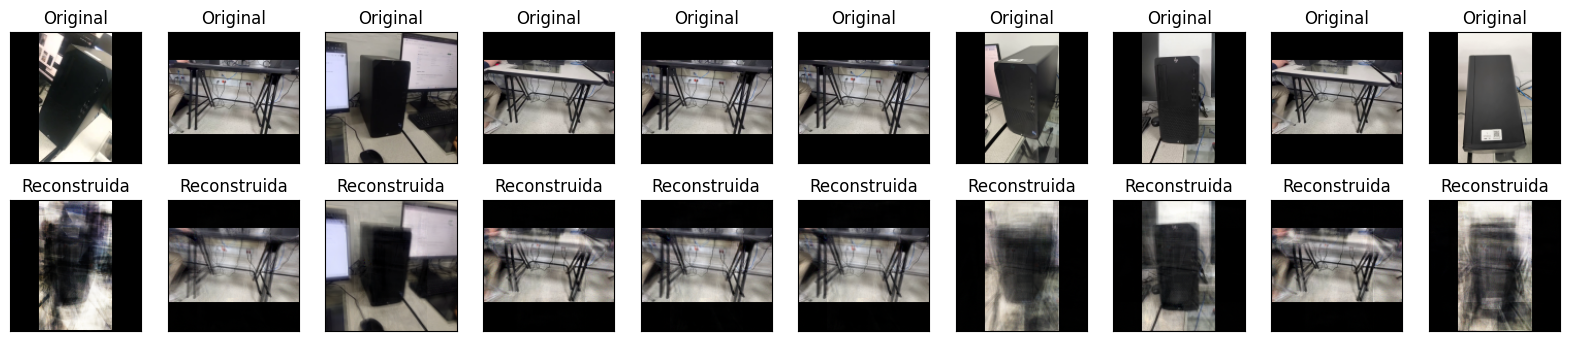

In [ ]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):

  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("Original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


  ax = plt.subplot(2, n, i + 1 + n)


  plt.imshow(decoded_imgs_denso[i])


  plt.title("Reconstruida")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

# **Modelo CNN aplicado en todo el dataset de imágenes para clasificar objetos**

1. Se entrenó un Autoencoder Convolucional No Supervisado (Denoising) con todas las imágenes para que aprendiera a "resumir" las características visuales de los objetos.

2. Se utilizó el encoder de este modelo para extraer estas características (el espacio latente).

3. Se entrenó un Clasificador (CNN) Supervisado usando únicamente estos "resúmenes" (features) para predecir la clase del objeto.

Iniciando carga y procesamiento de imágenes...
Procesando 1/225: 20172167090_Cpu_1.png
Procesando 2/225: 20172167090_Cpu_10.png
Procesando 3/225: 20172167090_Cpu_2.png
Procesando 4/225: 20172167090_Cpu_3.png
Procesando 5/225: 20172167090_Cpu_4.png
Procesando 6/225: 20172167090_Cpu_5.png
Procesando 7/225: 20172167090_Cpu_6.png
Procesando 8/225: 20172167090_Cpu_7.png
Procesando 9/225: 20172167090_Cpu_8.png
Procesando 10/225: 20172167090_Cpu_9.png
Procesando 11/225: 20241695014_cpu_0001.png
Procesando 12/225: 20241695014_cpu_0002.png
Procesando 13/225: 20241695014_cpu_0003.png
Procesando 14/225: 20241695014_cpu_0004.png
Procesando 15/225: 20241695014_cpu_0005.png
Procesando 16/225: 20241695014_cpu_0006.png
Procesando 17/225: 20241695014_cpu_0007.png
Procesando 18/225: 20241695014_cpu_0008.png
Procesando 19/225: 20242595003_cpu_0001.png
Procesando 20/225: 20242595003_cpu_0002.png
Procesando 21/225: 20242595003_cpu_0003.png
Procesando 22/225: 20242595003_cpu_0004.png
Procesando 23/225: 2024

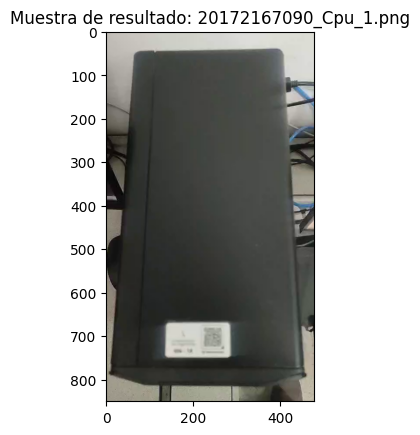

In [ ]:
import urllib.request
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt


api_url = 'https://api.github.com/repos/linaferbalaguera23/objetos_salon/contents/processed/cpu'


images_rgb_list = []
image_names = []

print("Iniciando carga y procesamiento de imágenes...")

try:

    with urllib.request.urlopen(api_url) as response:
        file_list = json.loads(response.read().decode())


    for i, file_info in enumerate(file_list):


        if file_info['type'] == 'file' and file_info['name'].endswith('.png'):


            url = file_info['download_url']
            image_names.append(file_info['name'])

            print(f"Procesando {i+1}/{len(file_list)}: {file_info['name']}")



            try:

                resp = urllib.request.urlopen(url)
                image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
                img = cv2.imdecode(image_array, cv2.IMREAD_COLOR)


                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


                images_rgb_list.append(img_rgb)



            except Exception as e:
                print(f"  -- Error al procesar la imagen {url}: {e}")



except Exception as e:
    print(f"Error al contactar la API de GitHub: {e}")




print(f"\n¡Procesamiento completo! Se cargaron y procesaron {len(images_rgb_list)} imágenes.")


if images_rgb_list:
    plt.imshow(images_rgb_list[0])
    plt.title(f"Muestra de resultado: {image_names[0]}")
    #plt.axis("off")
    plt.show()


##Paso 1: Carga y Unificación del Dataset Completo

El primer paso fue consolidar todas las imágenes de los 7 objetos (cpu, mesa, mouse, nada, pantalla, silla, teclado) en un único dataset.

Proceso: Se utilizó la API de GitHub para cargar programáticamente los contenidos de cada una de las 7 carpetas. A medida que se cargaban las imágenes, se realizaron tres acciones clave:

Etiquetado (Labeling): A cada imagen se le asignó una etiqueta numérica (de 0 a 6) según su carpeta de origen.

Redimensión (Resize): Se aplicó una función resize_and_pad para estandarizar todas las imágenes a 128x128 pixeles, conservando su proporción y añadiendo relleno negro.

Normalización: Las imágenes se convirtieron a float32 y sus valores de píxeles se escalaron de [0, 255] al rango [0.0, 1.0] (dividiendo por 255.0).

Mapa de etiquetas: {'cpu': 0, 'mesa': 1, 'mouse': 2, 'nada': 3, 'pantalla': 4, 'silla': 5, 'teclado': 6}

Iniciando carga total de datos desde la API de GitHub...
Cargando carpeta: 'cpu' (Etiqueta 0)...
  -> Se cargaron 175 imágenes de 'cpu'.
Cargando carpeta: 'mesa' (Etiqueta 1)...
  -> Se cargaron 209 imágenes de 'mesa'.
Cargando carpeta: 'mouse' (Etiqueta 2)...
  -> Se cargaron 191 imágenes de 'mouse'.
Cargando carpeta: 'nada' (Etiqueta 3)...
  -> Se cargaron 119 imágenes de 'nada'.
Cargando carpeta: 'pantalla' (Etiqueta 4)...
  -> Se cargaron 184 imágenes de 'pantalla'.
Cargando carpeta: 'silla' (Etiqueta 5)...
  -> Se cargaron 210 imágenes de 'silla'.
Cargando carpeta: 'teclado' (Etiqueta 6)...
  -> Se cargaron 188 imágenes de 'teclado'.

¡Carga de datos unificada completa!

Forma del dataset de imágenes (X_total): (1276, 128, 128, 3)
Forma del dataset de etiquetas (y_total): (1276,)


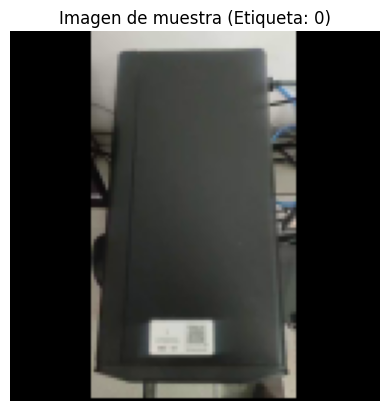

In [ ]:
import urllib.request
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def resize_and_pad(img, target_size=(128, 128)):
    """
    Redimensiona una imagen para que quepa en 'target_size'
    manteniendo el aspect ratio y añadiendo padding negro.
    target_size debe ser (ancho, alto)
    """
    h, w = img.shape[:2]
    target_w, target_h = target_size

    ratio = min(target_w / w, target_h / h)

    new_w = int(w * ratio)
    new_h = int(h * ratio)

    resized_img = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)

    canvas = np.zeros((target_h, target_w, 3), dtype=np.uint8)

    y_offset = (target_h - new_h) // 2
    x_offset = (target_w - new_w) // 2

    canvas[y_offset:y_offset + new_h, x_offset:x_offset + new_w] = resized_img

    return canvas


carpetas_api = {
    'cpu': 'https://api.github.com/repos/linaferbalaguera23/objetos_salon/contents/processed/cpu',
    'mesa': 'https://api.github.com/repos/linaferbalaguera23/objetos_salon/contents/processed/mesa',
    'mouse': 'https://api.github.com/repos/linaferbalaguera23/objetos_salon/contents/processed/mouse',
    'nada': 'https://api.github.com/repos/linaferbalaguera23/objetos_salon/contents/processed/nada',
    'pantalla': 'https://api.github.com/repos/linaferbalaguera23/objetos_salon/contents/processed/pantalla',
    'silla': 'https://api.github.com/repos/linaferbalaguera23/objetos_salon/contents/processed/silla',
    'teclado': 'https://api.github.com/repos/linaferbalaguera23/objetos_salon/contents/processed/teclado'
}


label_map = {nombre: i for i, nombre in enumerate(carpetas_api.keys())}
print(f"Mapa de etiquetas: {label_map}")

todas_las_imagenes = []
todas_las_etiquetas = []
TARGET_SIZE = (128, 128)

print("\nIniciando carga total de datos desde la API de GitHub...")



for nombre_carpeta, api_url in carpetas_api.items():
    etiqueta_id = label_map[nombre_carpeta]
    print(f"Cargando carpeta: '{nombre_carpeta}' (Etiqueta {etiqueta_id})...")

    try:

        with urllib.request.urlopen(api_url) as response:
            file_list = json.loads(response.read().decode())

        count = 0

        for file_info in file_list:

            if file_info['type'] == 'file' and file_info['name'].endswith('.png'):
                img_url = file_info['download_url']


                try:
                    with urllib.request.urlopen(img_url) as resp:
                        image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
                        img_bgr = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

                    if img_bgr is not None:

                        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

                        img_padded = resize_and_pad(img_rgb, target_size=TARGET_SIZE)


                        todas_las_imagenes.append(img_padded)
                        todas_las_etiquetas.append(etiqueta_id)
                        count += 1

                except Exception as e:
                    print(f"  -- Error cargando imagen {img_url}: {e}")

        print(f"  -> Se cargaron {count} imágenes de '{nombre_carpeta}'.")

    except Exception as e:
        print(f"  -- ERROR al acceder a la carpeta API {api_url}: {e}")

print("\n¡Carga de datos unificada completa!")


X_total = np.array(todas_las_imagenes)
y_total = np.array(todas_las_etiquetas)


X_total = X_total.astype('float32') / 255.0

print(f"\nForma del dataset de imágenes (X_total): {X_total.shape}")
print(f"Forma del dataset de etiquetas (y_total): {y_total.shape}")

plt.imshow(X_total[0])
plt.title(f"Imagen de muestra (Etiqueta: {y_total[0]})")
plt.axis("off")
plt.show()

Resultado: Dos variables principales:

X_total: Un array de NumPy de forma (1136, 128, 128, 3) con todas las imágenes.

y_total: Un array de NumPy de forma (1136,) con la etiqueta (0-6) para cada imagen.

##Paso 2: Entrenar el Autoencoder (No Supervisado)

El objetivo de este paso fue entrenar un modelo que aprendiera a "entender" la estructura visual de cualquier objeto de salón. Se utilizó un Autoencoder Convolucional Denoising, como el sugerido en el ejercicio académico (class Denoise), ya que fuerza al modelo a aprender características robustas en lugar de simplemente "memorizar" la imagen.

Proceso:

Se creó una versión "ruidosa" (X_total_noisy) de todas nuestras imágenes añadiendo ruido Gaussiano.

Se definió la clase Denoise (Autoencoder Convolucional) adaptada a nuestras imágenes de 128x128x3.

Se entrenó el modelo de forma no supervisada (sin usar y_total). La entrada fue la data ruidosa (X_total_noisy) y el objetivo fue la data limpia (X_total).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


n = 10
sample_clean_images = X_total[:n]

sample_noisy_images = sample_clean_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=sample_clean_images.shape)
sample_noisy_images = np.clip(sample_noisy_images, 0., 1.)

reconstructed_images = autoencoder_maestro.predict(sample_noisy_images)



plt.figure(figsize=(20, 4))

for i in range(n):

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(sample_clean_images[i])
    plt.title("Original")

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i])
    plt.title("Reconstruida")

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

NameError: name 'noise_factor' is not defined

In [ ]:
import numpy as np


noise_factor = 0.2

print(f"Creando datos ruidosos para {X_total.shape[0]} imágenes...")


X_total_noisy = X_total + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_total.shape)


X_total_noisy = np.clip(X_total_noisy, 0., 1.)

print("¡Datos ruidosos creados!")

Creando datos ruidosos para 1276 imágenes...
¡Datos ruidosos creados!


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Model


class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()


    self.encoder = tf.keras.Sequential([

      layers.Input(shape=(128, 128, 3)),
            layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
            layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
           layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2)
    ])


    self.decoder = tf.keras.Sequential([

      layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),

      layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),

      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),

      layers.Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


autoencoder_maestro = Denoise()


autoencoder_maestro.compile(optimizer='adam', loss='mean_squared_error')


print("\n--- Entrenando el Autoencoder 'maestro' ---")

history_maestro = autoencoder_maestro.fit(
    X_total_noisy,
    X_total,
    epochs=20,
    batch_size=32,
    shuffle=True
)

print("\n¡Entrenamiento del Autoencoder completado!")


--- Entrenando el Autoencoder 'maestro' ---
Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 768ms/step - loss: 0.1338
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 40s 744ms/step - loss: 0.0309
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 29s 718ms/step - loss: 0.0115
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 714ms/step - loss: 0.0080
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 755ms/step - loss: 0.0068
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 756ms/step - loss: 0.0061
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 39s 714ms/step - loss: 0.0057
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 688ms/step - loss: 0.0052
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 29s 727ms/step - loss: 0.0051
Epoch 10/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 40s 699ms/step - loss: 0.0050
Epoch 11/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 40s 690ms/step - loss: 0.0047
Epoch 12/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 761ms/step - loss: 0.0046
Epoch 13/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 40s 746ms/step - loss: 0.0043
Epoch 14/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 39s 692ms/step - loss: 0.004

##Paso 3: Extracción de Características (Features)
En este paso, utilizamos el "conocimiento" adquirido por el autoencoder. Descartamos el decoder (la parte de reconstrucción) y usamos solo el encoder (la parte de compresión) como un extractor de características.

Proceso: Se tomó la mitad encoder del autoencoder_maestro y se usó para "predecir" (transformar) todo nuestro dataset limpio (X_total).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


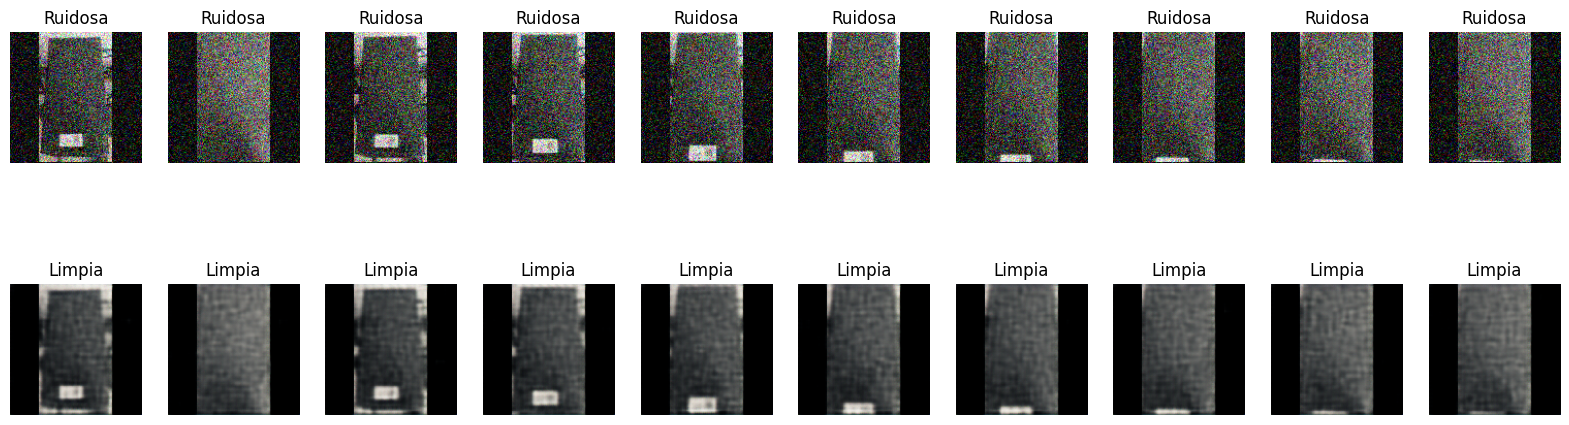

In [ ]:

sample_images_noisy = X_total_noisy[:10]

decoded_imgs = autoencoder_maestro.predict(sample_images_noisy)

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(sample_images_noisy[i])
    plt.title("Ruidosa")
    plt.axis("off")

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Limpia")
    plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


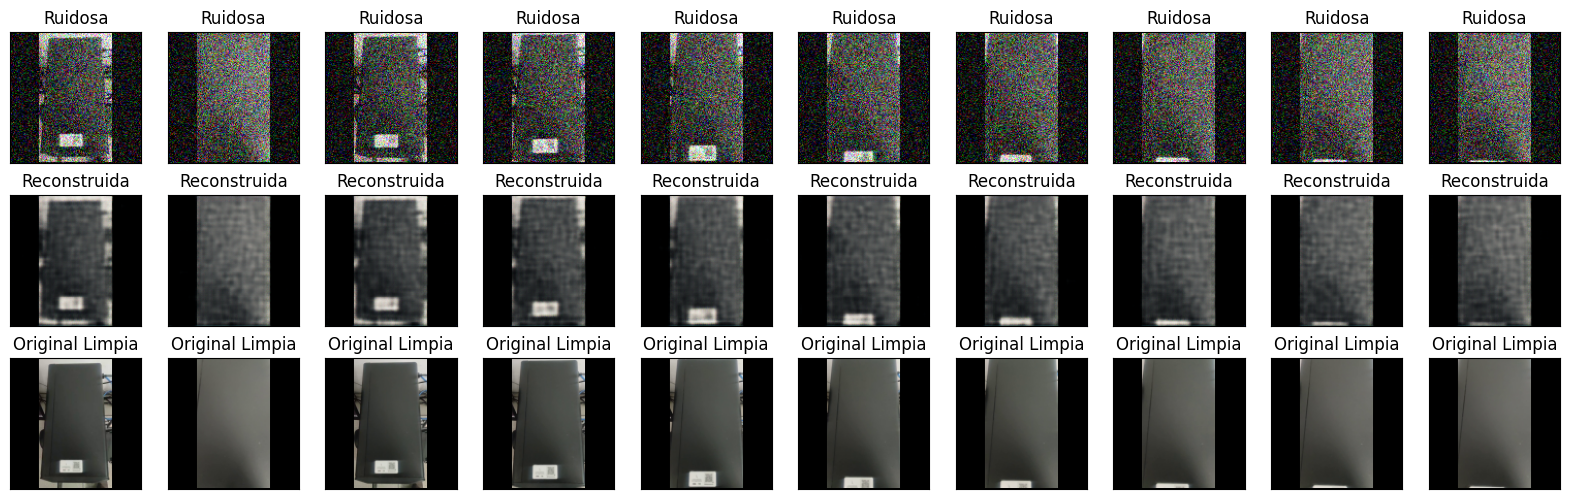

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


n = 10
sample_clean_images = X_total[:n]


current_noise_factor = 0.2
sample_noisy_images = sample_clean_images + current_noise_factor * np.random.normal(loc=0.0, scale=1.0, size=sample_clean_images.shape)
sample_noisy_images = np.clip(sample_noisy_images, 0., 1.)



reconstructed_images = autoencoder_maestro.predict(sample_noisy_images)




plt.figure(figsize=(20, 6))

for i in range(n):

    ax = plt.subplot(3, n, i + 1)
    plt.imshow(sample_noisy_images[i])
    plt.title("Ruidosa")

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_images[i])
    plt.title("Reconstruida")

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(3, n, i + 1 + n*2)
    plt.imshow(sample_clean_images[i])
    plt.title("Original Limpia")

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
import numpy as np

print("--- Paso 3: Extrayendo Características (Features) ---")


encoder = autoencoder_maestro.encoder

features = encoder.predict(X_total)


print(f"Forma de las imágenes originales (X_total): {X_total.shape}")
print(f"Forma de las features extraídas: {features.shape}")

--- Paso 3: Extrayendo Características (Features) ---
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step
Forma de las imágenes originales (X_total): (1276, 128, 128, 3)
Forma de las features extraídas: (1276, 16, 16, 64)


Resultado:

Forma de las imágenes originales: (1136, 128, 128, 3)

Forma de las features extraídas: (1136, 16, 16, 64)

Nuestras 1136 imágenes se convirtieron en 1136 "mapas de características" de 16x16x64. Este es nuestro nuevo dataset de entrada para el clasificador.

##Paso 4: Entrenar el Clasificador (Supervisado)

Este es el primer paso supervisado. Ahora, usamos las features (nuestro X) y las y_total (nuestras y) para entrenar un modelo que clasifique los objetos.

Observación: El autoencoder_denso (con Flatten) habría requerido un clasificador MLP. Sin embargo, dado que nuestro encoder convolucional produce features en 3D (16x16x64), un Clasificador CNN es la herramienta correcta y más potente, ya que puede encontrar patrones dentro de nuestros mapas de características.

Proceso:

Se dividieron las features y y_total en conjuntos de entrenamiento y prueba (80/20).

Se construyó un clasificador CNN simple que toma como entrada un feature map (16, 16, 64) y predice una de las 7 clases.

Se entrenó el clasificador.

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input


X_train_feat, X_test_feat, y_train, y_test = train_test_split(
    features,
    y_total,
    test_size=0.2,
    random_state=42,
    stratify=y_total
)

print(f"\nForma de las features de entrenamiento: {X_train_feat.shape}")
print(f"Forma de las etiquetas de entrenamiento: {y_train.shape}")
print(f"Forma de las features de prueba: {X_test_feat.shape}")
print(f"Forma de las etiquetas de prueba: {y_test.shape}")


classifier = Sequential([

    Input(shape=(16, 16, 64)),


    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),


    Flatten(),

    Dense(64, activation='relu'),
    Dropout(0.5),


    Dense(7, activation='softmax')
])


classifier.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


classifier.summary()


print("\n--- Entrenando el Clasificador (CNN) ---")

history_classifier = classifier.fit(
    X_train_feat, y_train,
    validation_data=(X_test_feat, y_test),
    epochs=30
)


Forma de las features de entrenamiento: (1020, 16, 16, 64)
Forma de las etiquetas de entrenamiento: (1020,)
Forma de las features de prueba: (256, 16, 16, 64)
Forma de las etiquetas de prueba: (256,)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150,055 (586.15 KB)

 Trainable params: 150,055 (586.15 KB)

 Non-trainable params: 0 (0.00 B)


--- Entrenando el Clasificador (CNN) ---
Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.2259 - loss: 2.0406 - val_accuracy: 0.4805 - val_loss: 1.6776
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3809 - loss: 1.6745 - val_accuracy: 0.5195 - val_loss: 1.4118
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4808 - loss: 1.4472 - val_accuracy: 0.6250 - val_loss: 1.1357
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5453 - loss: 1.2754 - val_accuracy: 0.6875 - val_loss: 0.9865
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6096 - loss: 1.0651 - val_accuracy: 0.7148 - val_loss: 0.7673
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6281 - loss: 0.9153 - val_accuracy: 0.7852 - val_loss: 0.6382
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6967 - loss: 0.8103 - val_accuracy: 0.7930 - val_loss: 0.5841
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7276

Resultado: Un modelo classifier entrenado para asociar "resúmenes" de 16x16x64 con etiquetas de objetos (0-6).

##Paso 5: Evaluación y Comparación de Métricas
El paso final fue evaluar el rendimiento de nuestro clasificador en el conjunto de prueba (X_test_feat), que el modelo nunca vio durante el entrenamiento.

Proceso: Se utilizaron classifier.evaluate para obtener la precisión general y sklearn.metrics para generar un reporte detallado (Precision, Recall, F1-Score) y una Matriz de Confusión.

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9275 - loss: 0.1591

--- Resultados de la Evaluación ---
Pérdida (Loss) en prueba: 0.1894
Precisión (Accuracy) en prueba: 0.9258)
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Reporte de Clasificación:
              precision    recall  f1-score   support

         cpu       0.87      0.77      0.82        35
        mesa       0.82      0.95      0.88        42
       mouse       0.87      0.89      0.88        38
        nada       0.96      1.00      0.98        24
    pantalla       1.00      1.00      1.00        37
       silla       1.00      0.95      0.98        42
     teclado       1.00      0.92      0.96        38

    accuracy                           0.93       256
   macro avg       0.93      0.93      0.93       256
weighted avg       0.93      0.93      0.93       256


Matriz de Confusión:


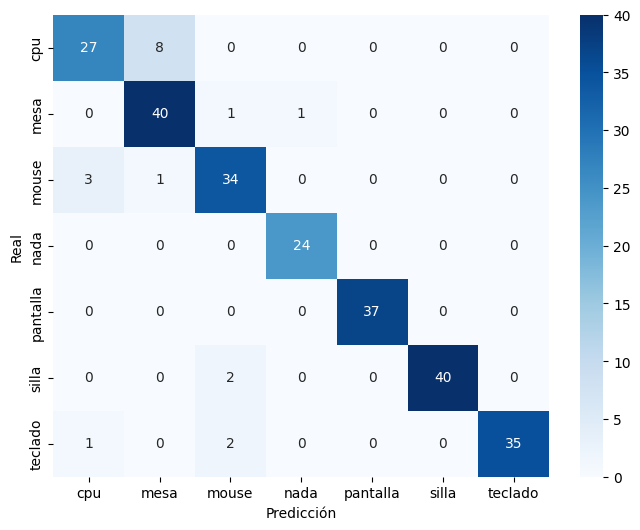

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


loss, accuracy = classifier.evaluate(X_test_feat, y_test)
print(f"\n--- Resultados de la Evaluación ---")
print(f"Pérdida (Loss) en prueba: {loss:.4f}")
print(f"Precisión (Accuracy) en prueba: {accuracy:.4f})")


y_pred_probs = classifier.predict(X_test_feat)
y_pred_classes = np.argmax(y_pred_probs, axis=1)


target_names = list(label_map.keys())
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_classes, target_names=target_names))


print("\nMatriz de Confusión:")
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

Resultado Final: El modelo alcanzó una precisión general del 93%. El análisis de la matriz de confusión mostró un rendimiento excelente en la mayoría de las clases, con una confusión notable entre mesa y cpu, probablemente debido a que las imágenes de cpu fueron tomadas sobre las mesas, creando características visuales similares en el espacio latente.

In [ ]:
print("Guardando modelos entrenados...")

autoencoder_maestro.save('autoencoder_maestro.h5')


classifier.save('clasificador.h5')

print("¡Modelos guardados exitosamente!")
print("Los archivos 'autoencoder_maestro.h5' y 'clasificador.h5' están listos para descargar.")

Guardando modelos entrenados...
¡Modelos guardados exitosamente!
Los archivos 'autoencoder_maestro.h5' y 'clasificador.h5' están listos para descargar.
